<a href="https://colab.research.google.com/github/RAHUL-B-PILLAI/coursework_heart_disease_pridiction/blob/main/decision_tree_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload= files.upload()

Saving heart.csv to heart (4).csv


In [ ]:
# Using pands to read csv file
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#data.drop(['ST_Slope','ExerciseAngina','RestingECG','ChestPainType','Sex'],axis=1,inplace=True)
#  
from sklearn import preprocessing
label= preprocessing.LabelEncoder()
data1=data.copy()
for i in data.columns[data1.dtypes=='object']:
  data1[i]=label.fit_transform(data[i])
data1.tail(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
911,59,1,0,164,176,1,0,90,0,1.0,1,1
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [ ]:
#get account of those with heart disease 
data1['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
X,Y=data1.iloc[:,:-1].values,data1.iloc[:,-1].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.80,random_state=45)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
ytrain_pred=dt.predict(x_train)
accuracy_score(ytrain_pred,y_train)

1.0

Text(0.5, 1.0, 'DT ROC Curve')

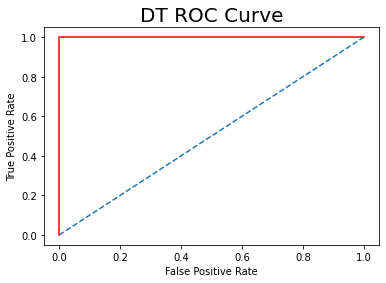

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


auc=roc_auc_score(y_train,ytrain_pred)
fpr,tpr,threshold=roc_curve(y_train,ytrain_pred)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve', size =20)


In [ ]:
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test)

0.7934782608695652

Text(0.5, 1.0, 'DT ROC Curve')

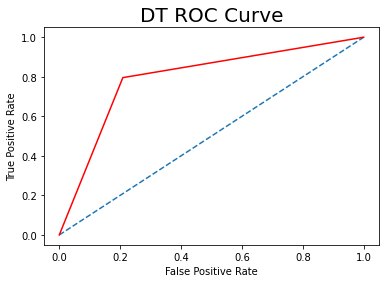

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

auc=roc_auc_score(y_test,y_pred)
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve', size =20)


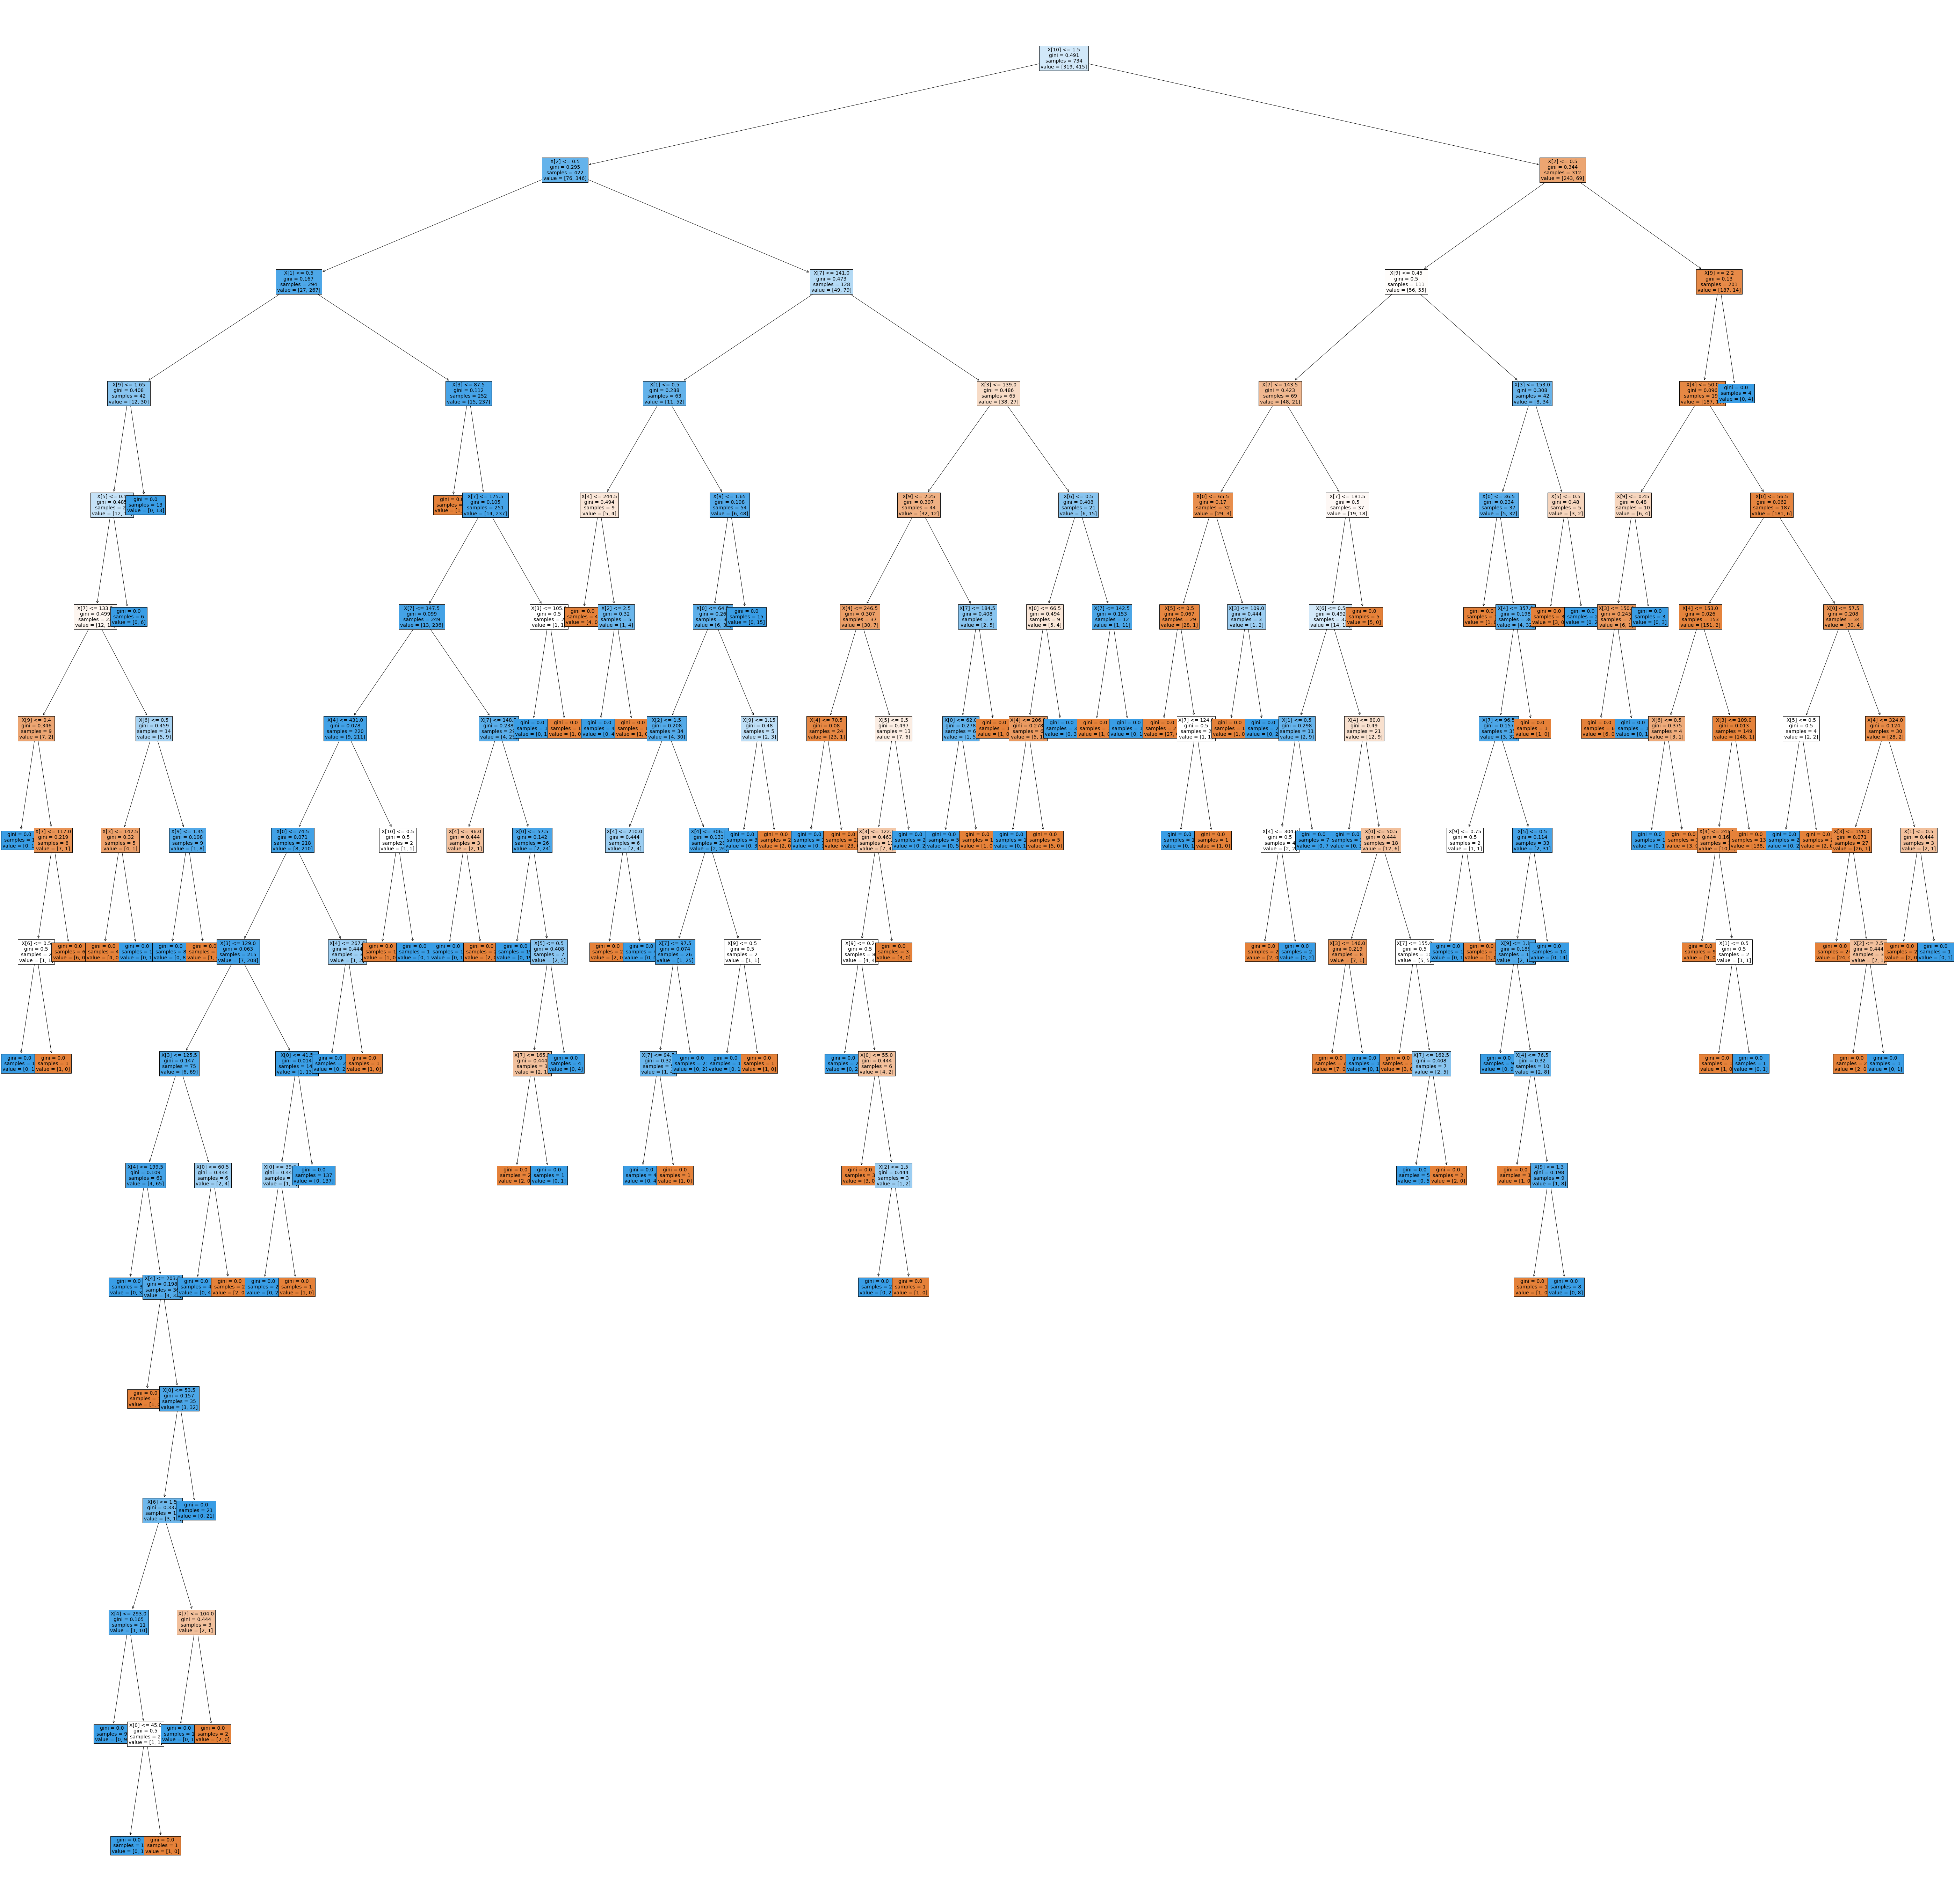

In [ ]:
from sklearn import tree
plt.figure(figsize=(100,100))
tree.plot_tree(dt, filled=True, fontsize=14)
plt.show()

**Handling oversamling in Decision Tree**

In [ ]:
criterion=['gini', 'entropy']
max_features=['auto', 'sqrt']
max_depth = [2,4,5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_leaf_nodes=[2,4,5, 8, 15]
parmgrid={'criterion':criterion,
          'max_features':max_features,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf,
          'max_leaf_nodes':max_leaf_nodes}

In [ ]:
from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(estimator=dt, param_grid=parmgrid, cv=3, verbose=2, n_jobs=4)

In [ ]:
dt_grid.fit(x_train,y_train)

Fitting 3 folds for each of 2800 candidates, totalling 8400 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 8, 15, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [2, 4, 5, 8, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100]},
             verbose=2)

**Random **

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(bootstrap=True,max_depth= 4,min_samples_leaf= 2,
 min_samples_split= 10,n_estimators= 30,random_state=1)

In [ ]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=30, random_state=1)

In [ ]:
ytrain_pred=rf_model.predict(x_train)
accuracy_score(ytrain_pred,y_train)

0.8841961852861036

In [ ]:
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test)

0.7934782608695652

In [ ]:
n_estimators =[10,20,30,40,50,100]
max_features=['auto', 'sqrt']
max_depth = [2,4,5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
bootstrap=[True, False]
parmgrid={'n_estimators':n_estimators,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf,
          'bootstrap':bootstrap}

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf_model, param_grid=parmgrid, cv=3, verbose=2, n_jobs=4)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 1680 candidates, totalling 5040 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=4, min_samples_leaf=2,
                                              min_samples_split=10,
                                              n_estimators=30, random_state=1),
             n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             verbose=2)

In [ ]:
rfnew_model= RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=10,n_estimators=30, random_state=1)

In [ ]:
rfnew_model.fit(x_train,y_train)

In [ ]:
y_pred=rfnew_model.predict(x_train)
accuracy_score(y_pred,y_train)

0.8841961852861036

In [ ]:
y_pred=rfnew_model.predict(x_test)
accuracy_score(y_pred,y_test)

0.8804347826086957